In [552]:
# Linux - install python3-pyaudio 
import sounddevice as sd
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

1. SYGNAŁ AUDIO

Zadanie 1

Głos: https://ttsmp3.com/

Zadanie 2

In [553]:
s, fs = sf.read('glos.mp3', dtype='float32')

# sd.play(s, fs)
# sd.wait()

Zadanie 3

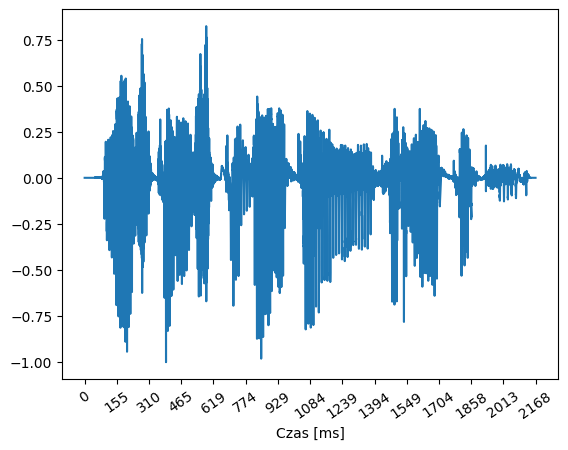

In [554]:
# sygnal_mono_lewy = s[:, 0] # jeśli stereo
# s = sygnal_mono_lewy
s /= np.max(np.abs(s)) # jeśli nie jest znormalizowany

czas_ms = len(s) / fs * 1000

x = np.linspace(0, czas_ms, len(s))

plt.plot(x, s);
plt.xlabel('Czas [ms]')
plt.xticks(np.linspace(0, czas_ms, 15), rotation=35);


Zadanie 4

Zadanie 5

2. Zastosowanie okien kroczących

Zadanie 1

In [555]:
ramka_10ms = fs * 0.01
liczba_ramek = len(s) // ramka_10ms
ramki = np.array_split(s, liczba_ramek)

E = [np.sum(np.power(ramka, 2)) for ramka in ramki]
E = np.array(E)

Z = np.empty_like(E)
for i, ramka in enumerate(ramki):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z[i] = np.sum(zi)

Zadanie 2

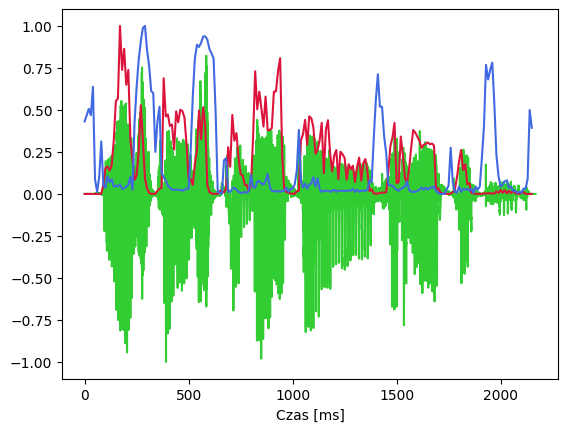

In [556]:
Z /= np.max(np.abs(Z))
E = np.array(E)
E /=  np.max(np.abs(E))

x_ramki = np.arange(0, czas_ms, 10)[:E.shape[0]]

plt.plot(x, s, color='limegreen')
plt.xlabel('Czas [ms]');
plt.plot(x_ramki, E, color='crimson')
plt.plot(x_ramki, Z, color='royalblue');




Zadanie 3

funkcja E:
    minima - momenty ciszy (np. przerwy między słowami gdy słychac jedynie szum mikrofonu)
    maksima - głośniejsze fragmenty (np. wypowiadane słowa)

Funkcja Z:
    maksima - wiele zmian częstotliwości dźwięku
    minima - małe zmiany w częstotliwości dźwięku (np. cisza lub jednolity dźwięk)

Można ich użyć do podziału sygnału na segmenty dźwięcznie i bezdźwięczne:
    funkcja E - sygnał poniżej pewnych wartości można uznać za bezdźwięczny
    funkcja Z - wykrywanie aktywności głosowej

Zadanie 4

In [557]:
ramka_5ms = fs * 0.005
ramka_20ms = fs * 0.02
ramka_50ms = fs * 0.05

liczba_ramek_5ms = len(s) // ramka_5ms
ramki_5ms = np.array_split(s, liczba_ramek_5ms)
liczba_ramek_20ms = len(s) // ramka_20ms
ramki_20ms = np.array_split(s, liczba_ramek_20ms)
liczba_ramek_50ms = len(s) // ramka_50ms
ramki_50ms = np.array_split(s, liczba_ramek_50ms)

E_5ms = [np.sum(np.power(ramka, 2)) for ramka in ramki_5ms]
E_5ms = np.array(E_5ms)
E_20ms = [np.sum(np.power(ramka, 2)) for ramka in ramki_20ms]
E_20ms = np.array(E_20ms)
E_50ms = [np.sum(np.power(ramka, 2)) for ramka in ramki_50ms]
E_50ms = np.array(E_50ms)

Z_5ms = np.empty_like(E_5ms)
for i, ramka in enumerate(ramki_5ms):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_5ms[i] = np.sum(zi)

Z_20ms = np.empty_like(E_20ms)
for i, ramka in enumerate(ramki_20ms):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_20ms[i] = np.sum(zi)

Z_50ms = np.empty_like(E_50ms)
for i, ramka in enumerate(ramki_50ms):
    zi = [0 if ramka[j] * ramka[j + 1] > 0 else 1 for j in range(len(ramka) - 1)]
    Z_50ms[i] = np.sum(zi)

Z_5ms /= np.max(np.abs(Z_5ms))
E_5ms /=  np.max(np.abs(E_5ms))
Z_20ms /= np.max(np.abs(Z_20ms))
E_20ms /=  np.max(np.abs(E_20ms))
Z_50ms /= np.max(np.abs(Z_50ms))
E_50ms /=  np.max(np.abs(E_50ms))

E_5ms.shape
x_ramki_5ms = np.arange(0, czas_ms, 5)[:E_5ms.shape[0]]
x_ramki_20ms = np.arange(0, czas_ms, 20)[:E_20ms.shape[0]]
x_ramki_50ms = np.arange(0, czas_ms, 50)[:E_50ms.shape[0]]

(433,)